## Notebook to explore different similarity kernels used to compute MMD
A kernel computes the similarity between two inputs X,Y and defines a RKHS 

In [1]:
from pathlib import Path
import os
_cwd = os.getcwd()

In [2]:
os.chdir(Path(_cwd)/'..') # .\SAE\
os.getcwd()

'C:\\Users\\Giulia\\Study\\projects\\research\\SAE'

In [3]:
import numpy as np
import torch
from matplotlib.lines import Line2D
%matplotlib notebook
import matplotlib.pyplot as plt
from models import utils

In [4]:
#RBF_kernel
#IMQ_kernel
#Categorical_kernel

### Visualisations

In [5]:

from matplotlib.collections import LineCollection

In [6]:
# making a 2-dimensional grid between -1 and 1
x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)

In [7]:
def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()

<IPython.core.display.Javascript object>


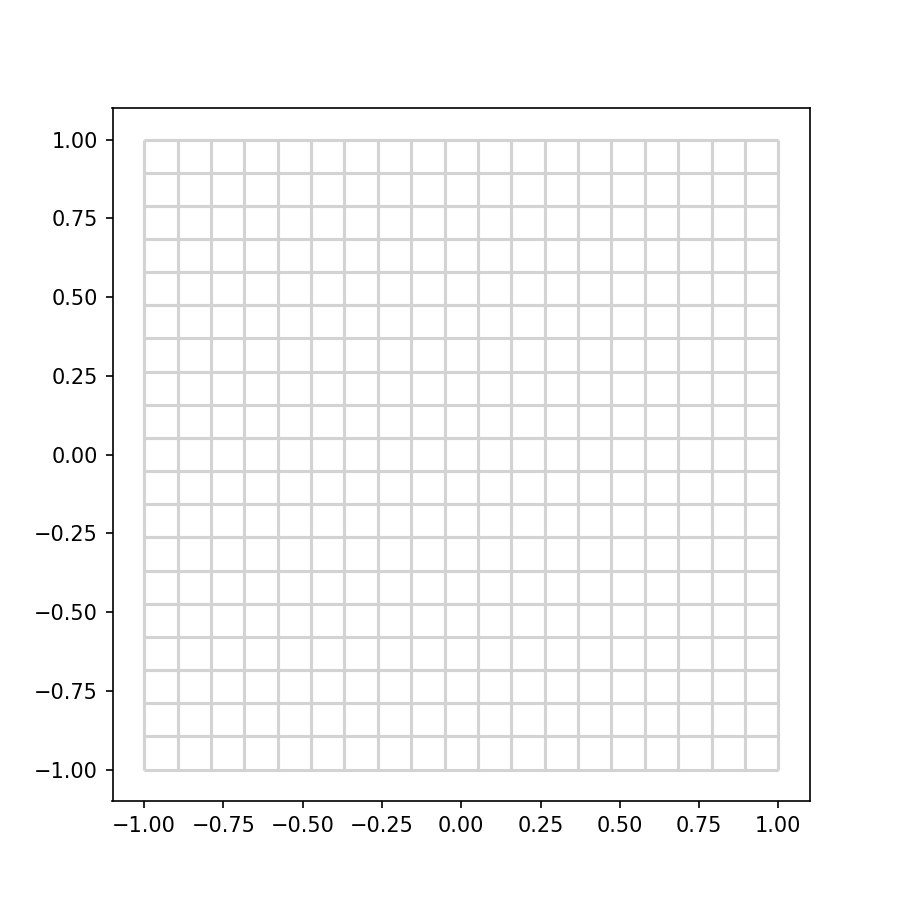

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

grid_x,grid_y = np.meshgrid(np.linspace(-1,1,20),np.linspace(-1,1,20))
plot_grid(grid_x,grid_y, ax=ax,  color="lightgrey")

plt.show()

In [9]:
#RBF_kernel
#IMQ_kernel
#Categorical_kernel

In [9]:
X = torch.zeros(400,2)
Y = torch.randn(400,2)
i = 0
for x_i in enumerate(xx[0]): 
    for y_i in enumerate(yy[:,0]):
        X[i,:] = torch.Tensor(torch.Tensor([x_i[1],y_i[1]]))
        i+=1

In [10]:
%pdb 1 #for debugging

Incorrect argument. Use on/1, off/0, or nothing for a toggle.


In [11]:
similarities_RBF,_,_ = utils.RBF_kernel(X,X)
similarities_IMQ,_,_ = utils.IMQ_kernel(X,X)
similarities_cat,_,_ = utils.Categorical_kernel(X,X)

In [12]:
torch.max(similarities_cat)

tensor(3.8000)

In [13]:
#MDS to project Kernel space 2D space 
from sklearn.manifold import MDS
embedding_2d = MDS(n_components=2, metric=True, verbose=1, random_state=11, dissimilarity='precomputed')
X_RBF_manifold_2d = embedding_2d.fit_transform(1 - similarities_RBF.numpy())
X_IMQ_manifold_2d = embedding_2d.fit_transform(7 - similarities_IMQ.numpy())
X_cat_manifold_2d = embedding_2d.fit_transform(4 - similarities_cat.numpy())

breaking at iteration 32 with stress 434.163521519309
breaking at iteration 45 with stress 434.16933999813057
breaking at iteration 37 with stress 434.1583320727004
breaking at iteration 29 with stress 434.17219340191605
breaking at iteration 41 with stress 10571.99974867578
breaking at iteration 58 with stress 10571.947834579816
breaking at iteration 48 with stress 10572.190910156318
breaking at iteration 39 with stress 10572.000346741708
breaking at iteration 45 with stress 1991.1236458405601
breaking at iteration 60 with stress 1990.998972788856
breaking at iteration 52 with stress 1991.1928407662908
breaking at iteration 42 with stress 1991.1446777378276


<IPython.core.display.Javascript object>


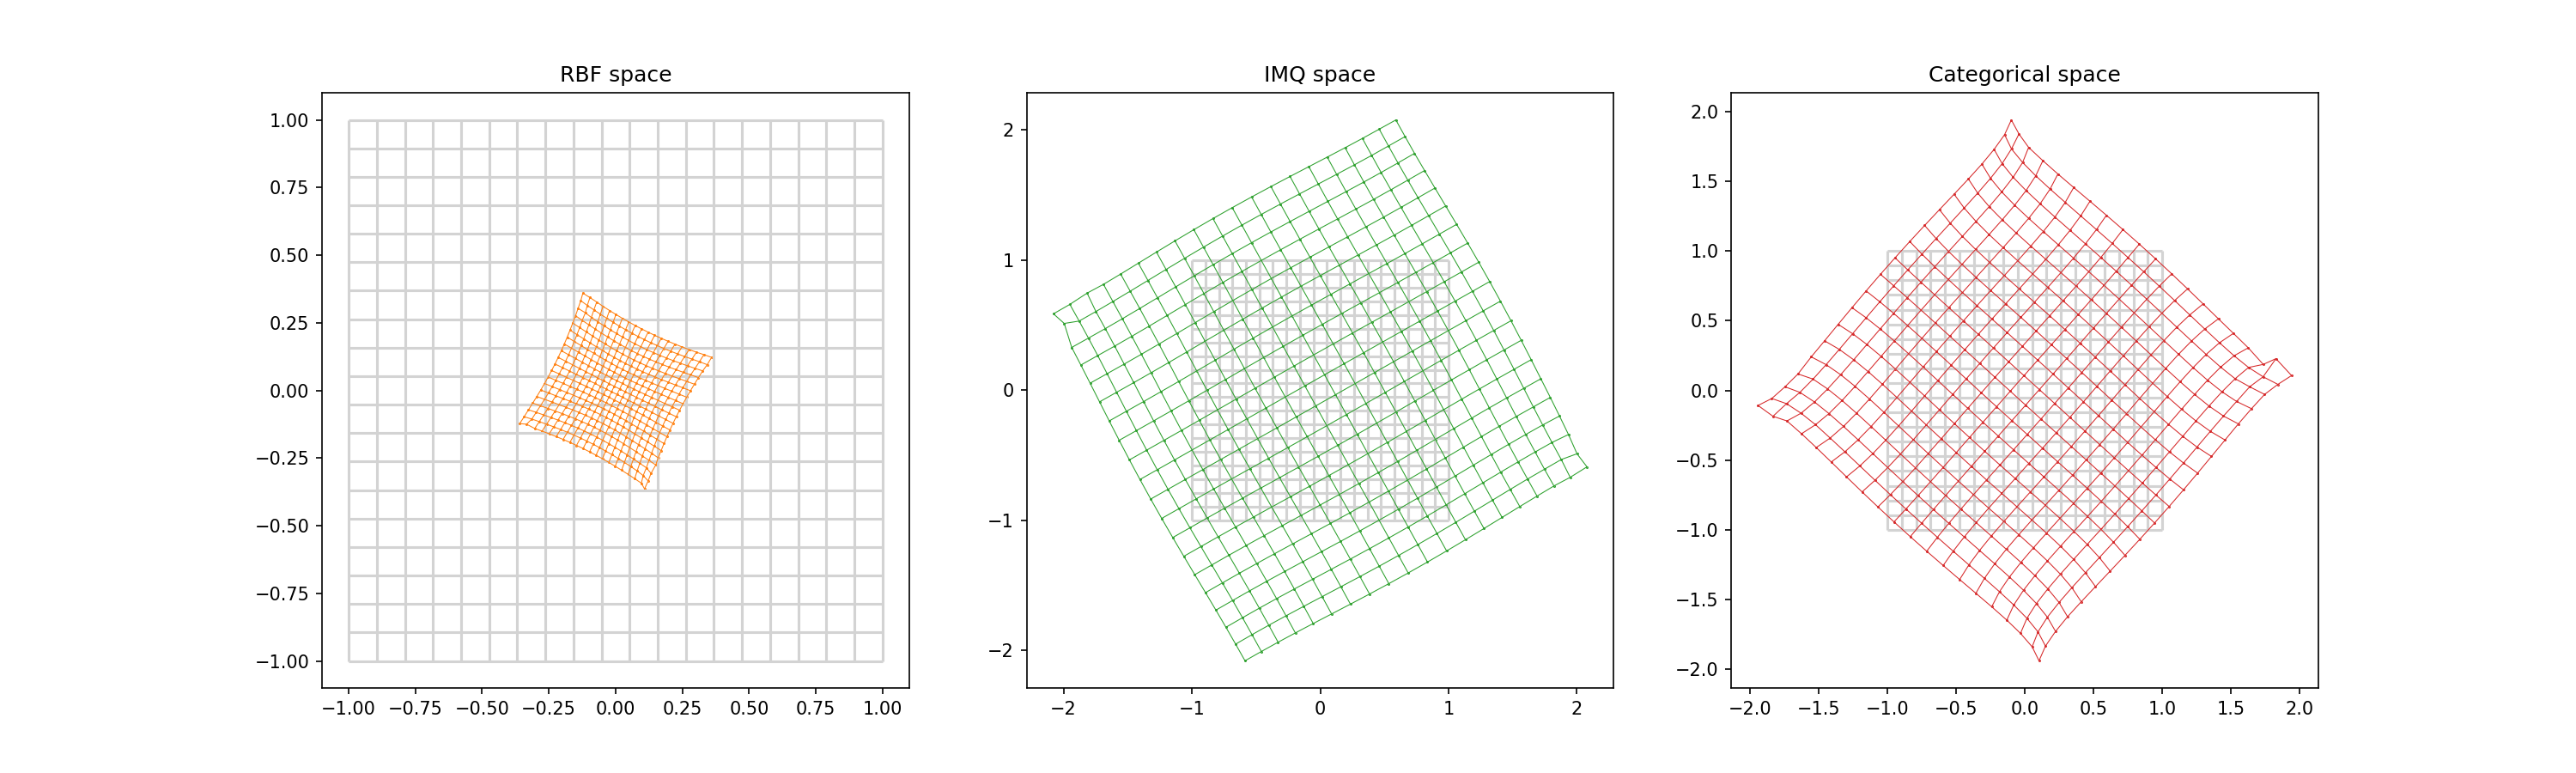

In [14]:
#TODO: mark points 
#TODO: insert grid
fig, axs = plt.subplots(1,3, figsize=(20,6))
plot_grid(grid_x,grid_y, ax=axs[0],  color="lightgrey")
axs[0].scatter(np.expand_dims(X_RBF_manifold_2d[:,0],1), 
          np.expand_dims(X_RBF_manifold_2d[:,1],1), color="C1", s=0.2)
X_RBF_r = torch.Tensor(X_RBF_manifold_2d).view(20,20,2).numpy()
for i in range(20):
    axs[0].plot(X_RBF_r[i,:,0], X_RBF_r[i,:,1],color="C1", linewidth=.5)
    axs[0].plot(X_RBF_r[:,i,0], X_RBF_r[:,i,1],color="C1",linewidth=.5)

axs[0].set_title("RBF space")
plot_grid(grid_x,grid_y, ax=axs[1],  color="lightgrey")
axs[1].scatter(np.expand_dims(X_IMQ_manifold_2d[:,0],1), 
          np.expand_dims(X_IMQ_manifold_2d[:,1],1), color="C2", s=0.2)
X_IMQ_r = torch.Tensor(X_IMQ_manifold_2d).view(20,20,2).numpy()
for i in range(20):
    axs[1].plot(X_IMQ_r[i,:,0], X_IMQ_r[i,:,1],color="C2",linewidth=.5)
    axs[1].plot(X_IMQ_r[:,i,0], X_IMQ_r[:,i,1],color="C2",linewidth=.5)
axs[1].set_title("IMQ space")

plot_grid(grid_x,grid_y, ax=axs[2],  color="lightgrey")
axs[2].scatter(np.expand_dims(X_cat_manifold_2d[:,0],1), 
          np.expand_dims(X_cat_manifold_2d[:,1],1), color="C3", s=0.2)
X_cat_r = torch.Tensor(X_cat_manifold_2d).view(20,20,2).numpy()
for i in range(20):
    axs[2].plot(X_cat_r[i,:,0], X_cat_r[i,:,1],color="C3",linewidth=.5)
    axs[2].plot(X_cat_r[:,i,0], X_cat_r[:,i,1],color="C3",linewidth=.5)
axs[2].set_title("Categorical space")
plt.show()

In [15]:
#MDS to project to 3D space 
from sklearn.manifold import MDS
embedding = MDS(n_components=3, metric=True, verbose=1, random_state=11, dissimilarity='precomputed')
X_RBF_manifold_3d = embedding.fit_transform(1 - similarities_RBF.numpy())
X_IMQ_manifold_3d = embedding.fit_transform(7 - similarities_IMQ.numpy())
X_cat_manifold_3d = embedding.fit_transform(4 - similarities_cat.numpy())

breaking at iteration 38 with stress 434.3993169801946
breaking at iteration 37 with stress 434.35216997498736
breaking at iteration 39 with stress 434.38641158661517
breaking at iteration 38 with stress 434.342968337717
breaking at iteration 75 with stress 10546.95218637242
breaking at iteration 69 with stress 10577.146757799586
breaking at iteration 71 with stress 10542.27910733782
breaking at iteration 79 with stress 10552.72007924095
breaking at iteration 152 with stress 1492.0466748144477
breaking at iteration 169 with stress 1673.2737005860558
breaking at iteration 171 with stress 1673.5831345154918


In [16]:
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


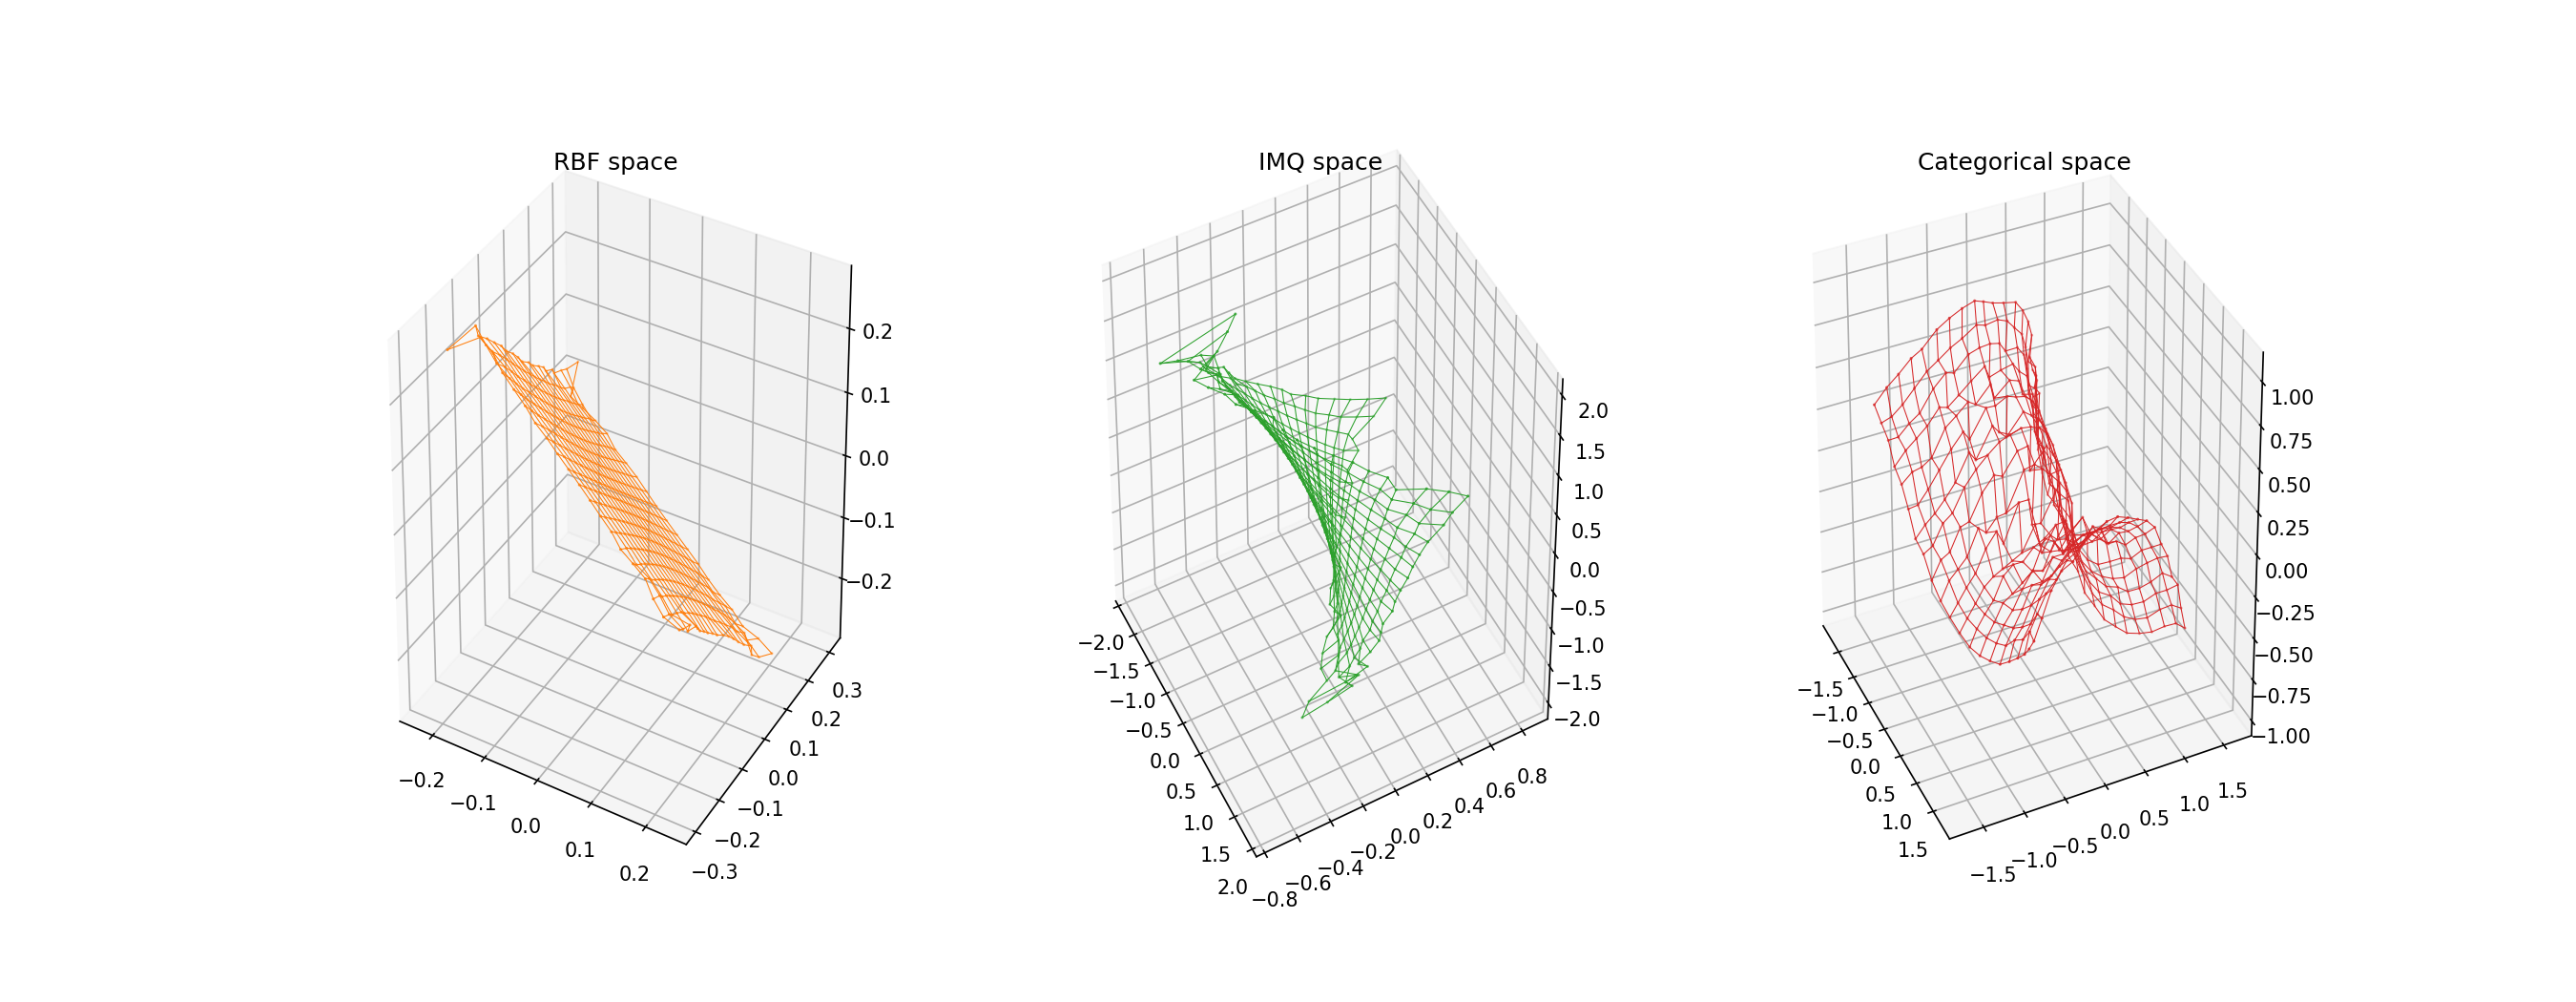

Text(0.5, 0.92, 'Categorical space')

In [17]:
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(np.expand_dims(X_RBF_manifold_3d[:,0],1), 
           np.expand_dims(X_RBF_manifold_3d[:,1],1), 
           np.expand_dims(X_RBF_manifold_3d[:,2],1),
           color="C1", s=0.2)
X_RBF_r_3d = torch.Tensor(X_RBF_manifold_3d).view(20,20,3).numpy()
for i in range(20):
    ax.plot(X_RBF_r_3d[i,:,0], X_RBF_r_3d[i,:,1],X_RBF_r_3d[i,:,2],color="C1", linewidth=.5)
    ax.plot(X_RBF_r_3d[:,i,0], X_RBF_r_3d[:,i,1],X_RBF_r_3d[:,i,2],color="C1",linewidth=.5)
ax.set_title("RBF space")

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(np.expand_dims(X_IMQ_manifold_3d[:,0],1), 
           np.expand_dims(X_IMQ_manifold_3d[:,1],1), 
           np.expand_dims(X_IMQ_manifold_3d[:,2],1),
           color="C2", s=0.2)
X_IMQ_r_3d = torch.Tensor(X_IMQ_manifold_3d).view(20,20,3).numpy()
for i in range(20):
    ax.plot(X_IMQ_r_3d[i,:,0], X_IMQ_r_3d[i,:,1],X_IMQ_r_3d[i,:,2],color="C2", linewidth=.5)
    ax.plot(X_IMQ_r_3d[:,i,0], X_IMQ_r_3d[:,i,1],X_IMQ_r_3d[:,i,2],color="C2",linewidth=.5)
ax.set_title("IMQ space")

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(np.expand_dims(X_cat_manifold_3d[:,0],1), 
           np.expand_dims(X_cat_manifold_3d[:,1],1), 
           np.expand_dims(X_cat_manifold_3d[:,2],1),
           color="C3", s=0.2)
X_cat_r_3d = torch.Tensor(X_cat_manifold_3d).view(20,20,3).numpy()
for i in range(20):
    ax.plot(X_cat_r_3d[i,:,0], X_cat_r_3d[i,:,1],X_cat_r_3d[i,:,2],color="C3", linewidth=.5)
    ax.plot(X_cat_r_3d[:,i,0], X_cat_r_3d[:,i,1],X_cat_r_3d[:,i,2],color="C3",linewidth=.5)
ax.set_title("Categorical space")


### On categorical space

In [25]:
similarities_cat_H,_,_ = utils.Categorical_kernel(X,X, strict=False, hierarchy=True) #adding hierarchy
similarities_cat_HS,_,_ = utils.Categorical_kernel(X,X, strict=True, hierarchy=True) #using L0 norm and hierarchy
similarities_cat_S,_,_ = utils.Categorical_kernel(X,X, strict=True, hierarchy=False) #using L0 norm

In [26]:
torch.max(similarities_cat_S)

tensor(2.)

In [27]:
X_catH_manifold_3d = embedding.fit_transform(4 - similarities_cat_H.numpy())
X_catHS_manifold_3d = embedding.fit_transform(2 - similarities_cat_HS.numpy()) 
X_catS_manifold_3d = embedding.fit_transform(2 - similarities_cat_S.numpy()) 

breaking at iteration 274 with stress 5822.926019076686


<IPython.core.display.Javascript object>


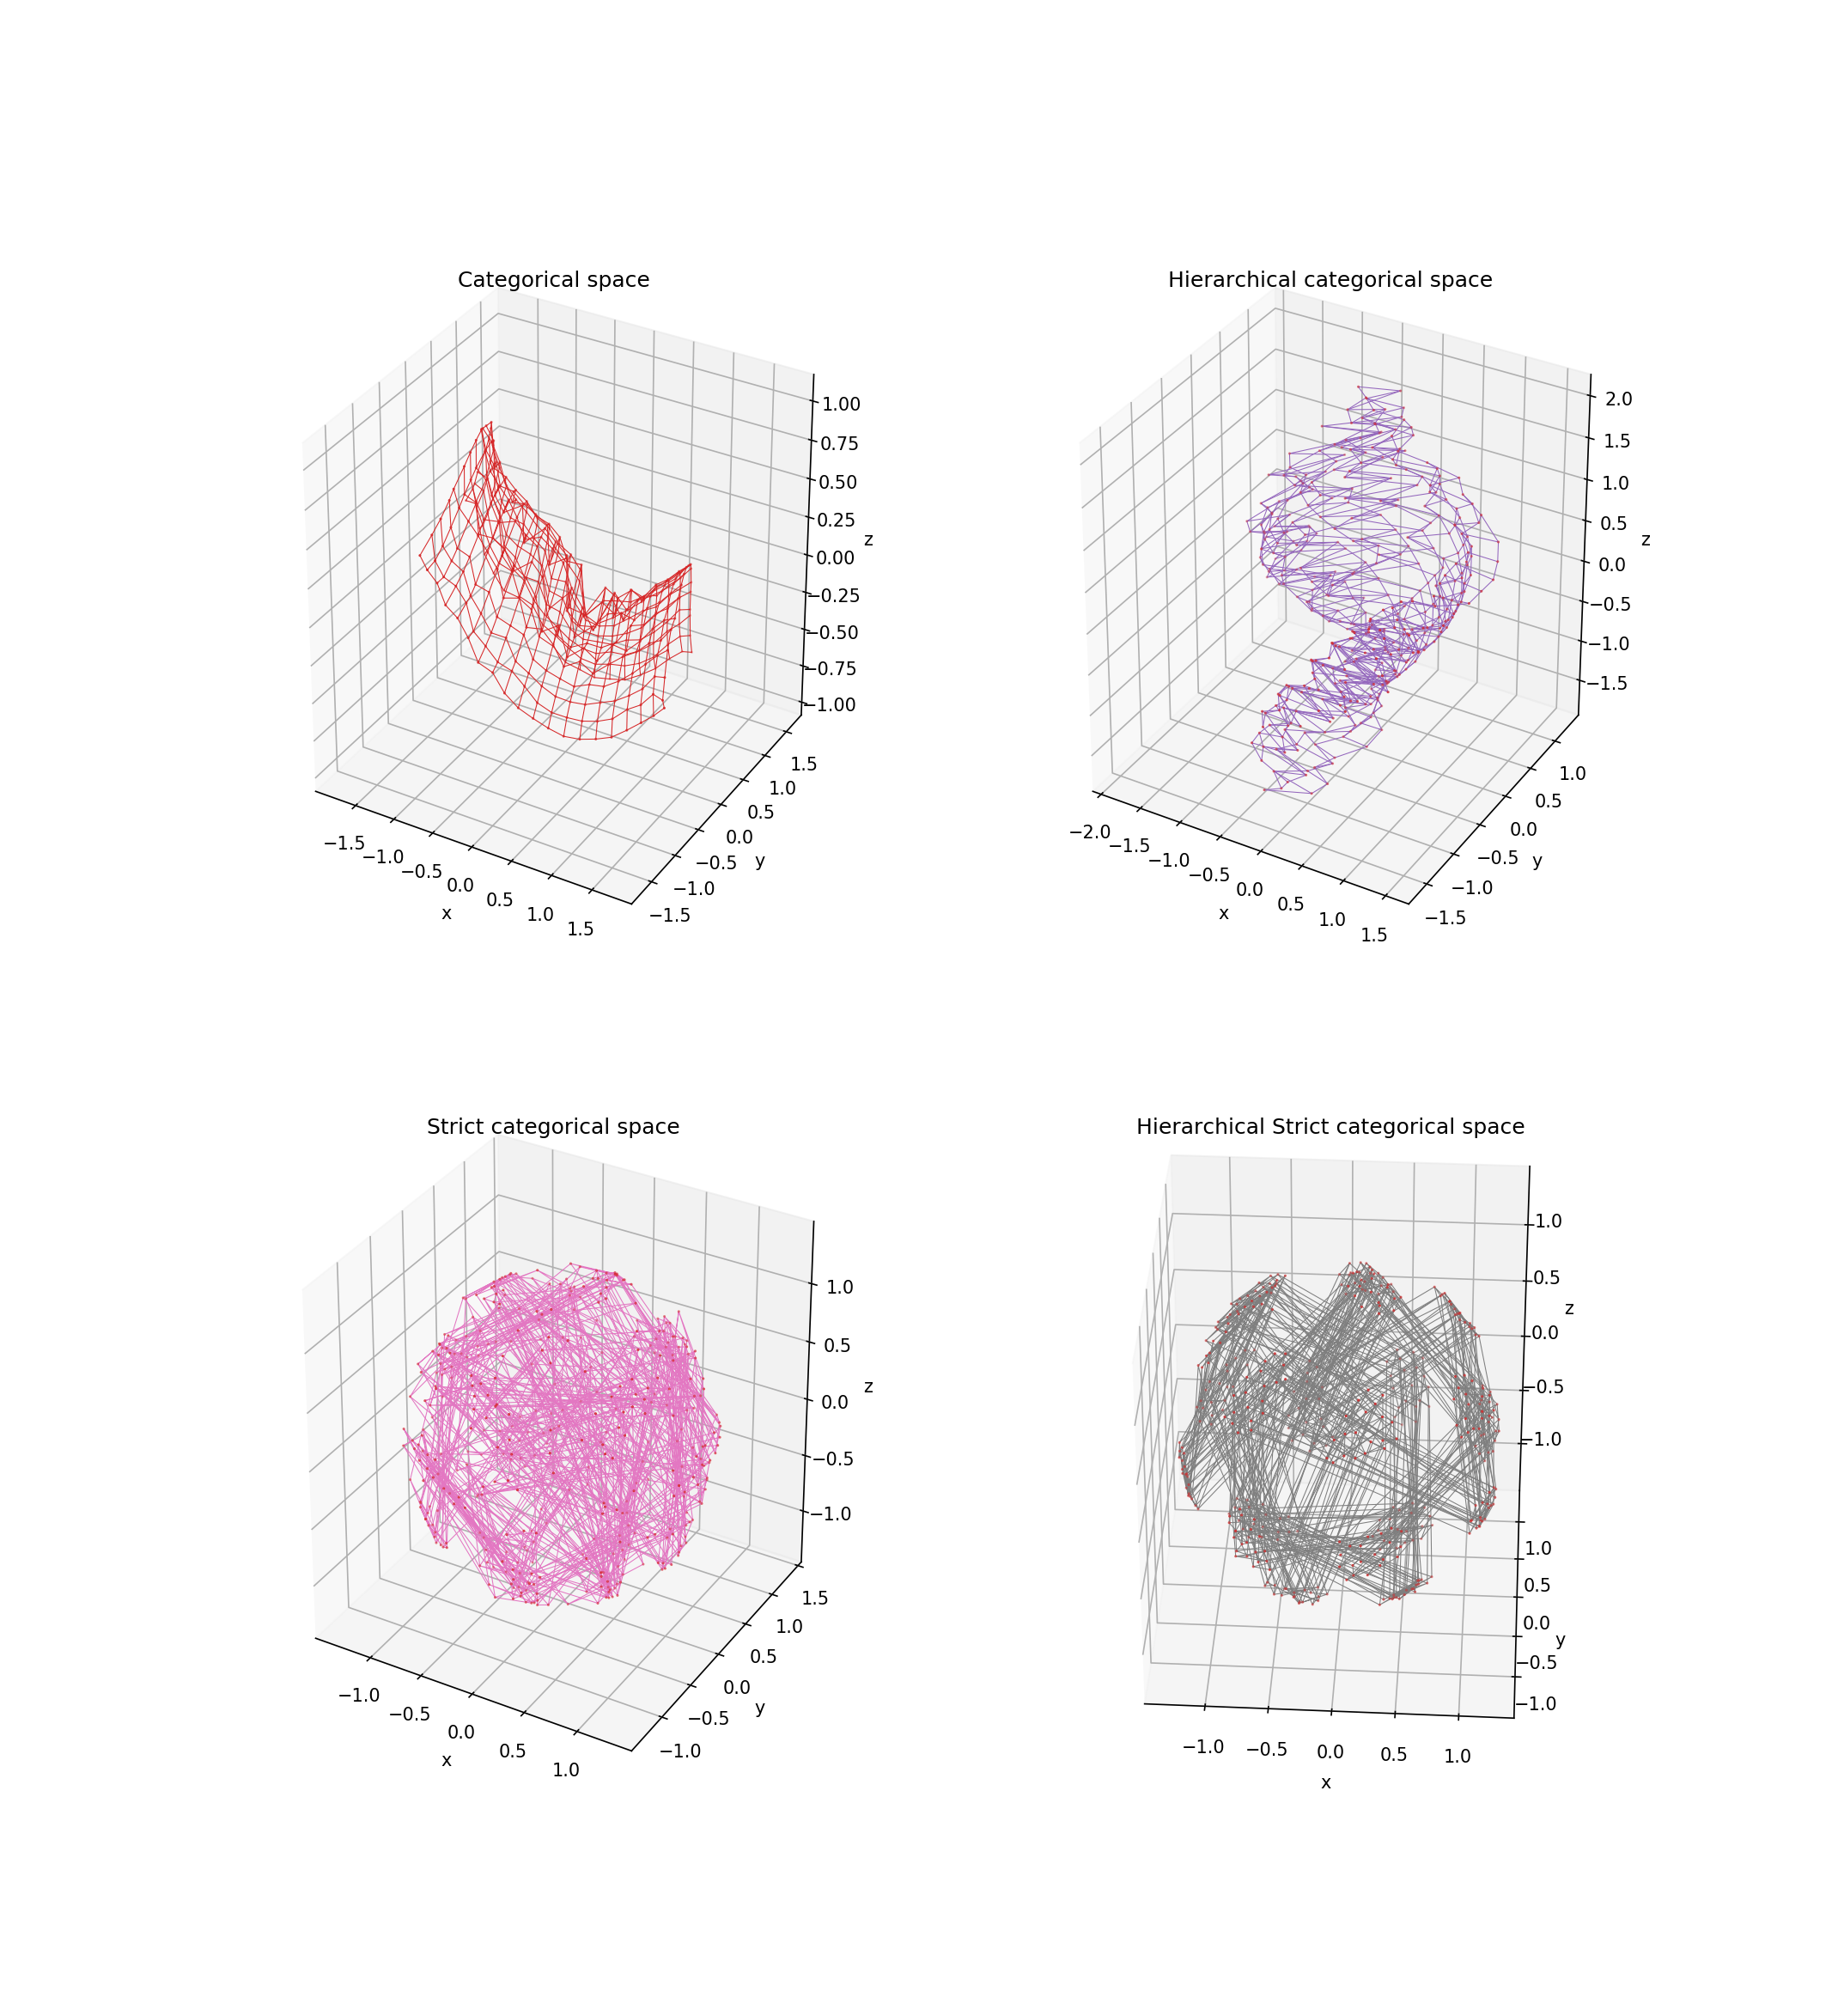

Text(0.5, 0.92, 'Hierarchical Strict categorical space')

In [33]:
fig = plt.figure(figsize=(18,18))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(np.expand_dims(X_cat_manifold_3d[:,0],1), 
           np.expand_dims(X_cat_manifold_3d[:,1],1), 
           np.expand_dims(X_cat_manifold_3d[:,2],1),
           color="C3", s=0.2)
X_cat_r_3d = torch.Tensor(X_cat_manifold_3d).view(20,20,3).numpy()
for i in range(20):
    ax.plot(X_cat_r_3d[i,:,0], X_cat_r_3d[i,:,1],X_cat_r_3d[i,:,2],color="C3", linewidth=.5)
    ax.plot(X_cat_r_3d[:,i,0], X_cat_r_3d[:,i,1],X_cat_r_3d[:,i,2],color="C3",linewidth=.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Categorical space")

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(np.expand_dims(X_catH_manifold_3d[:,0],1), 
           np.expand_dims(X_catH_manifold_3d[:,1],1), 
           np.expand_dims(X_catH_manifold_3d[:,2],1),
           color="C3", s=0.2)
X_catH_r_3d = torch.Tensor(X_catH_manifold_3d).view(20,20,3).numpy()
for i in range(20):
    ax.plot(X_catH_r_3d[i,:,0], X_catH_r_3d[i,:,1],X_catH_r_3d[i,:,2],color="C4", linewidth=.5)
    ax.plot(X_catH_r_3d[:,i,0], X_catH_r_3d[:,i,1],X_catH_r_3d[:,i,2],color="C4",linewidth=.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Hierarchical categorical space")


ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(np.expand_dims(X_catS_manifold_3d[:,0],1), 
           np.expand_dims(X_catS_manifold_3d[:,1],1), 
           np.expand_dims(X_catS_manifold_3d[:,2],1),
           color="C3", s=0.2)
X_catS_r_3d = torch.Tensor(X_catS_manifold_3d).view(20,20,3).numpy()
for i in range(20):
    ax.plot(X_catS_r_3d[i,:,0], X_catS_r_3d[i,:,1],X_catS_r_3d[i,:,2],color="C6", linewidth=.5)
    ax.plot(X_catS_r_3d[:,i,0], X_catS_r_3d[:,i,1],X_catS_r_3d[:,i,2],color="C6",linewidth=.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Strict categorical space")

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(np.expand_dims(X_catHS_manifold_3d[:,0],1), 
           np.expand_dims(X_catHS_manifold_3d[:,1],1), 
           np.expand_dims(X_catHS_manifold_3d[:,2],1),
           color="C3", s=0.2)
X_catHS_r_3d = torch.Tensor(X_catHS_manifold_3d).view(20,20,3).numpy()
for i in range(20):
    ax.plot(X_catHS_r_3d[i,:,0], X_catHS_r_3d[i,:,1],X_catHS_r_3d[i,:,2],color="C7", linewidth=.5)
    ax.plot(X_catHS_r_3d[:,i,0], X_catHS_r_3d[:,i,1],X_catHS_r_3d[:,i,2],color="C7",linewidth=.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Hierarchical Strict categorical space")

In [51]:
similarities_cat_H[0,:20]

tensor([3.2075, 3.1330, 3.0584, 2.9839, 2.9094, 2.8348, 2.7603, 2.6858, 2.6112,
        2.5367, 2.4622, 2.3876, 2.3131, 2.2386, 2.1640, 2.0895, 2.0149, 1.9404,
        1.8659, 1.7913])

In [52]:
similarities_cat_H[0,20:40]

tensor([3.1132, 3.0387, 2.9642, 2.8896, 2.8151, 2.7406, 2.6660, 2.5915, 2.5169,
        2.4424, 2.3679, 2.2933, 2.2188, 2.1443, 2.0697, 1.9952, 1.9207, 1.8461,
        1.7716, 1.6971])

## MMD

Interpretation of output: Maximum mean discrepancy = measure divergence of the means of the two distributionsunder maximum possible distortion -> farther from 0 is more different

In [63]:
# same continuous distribution 
X = torch.randn(100,10)
Y = torch.randn(100,10)
MMD_RBF = utils.MMD(*utils.RBF_kernel(X, Y))
MMD_IMQ = utils.MMD(*utils.IMQ_kernel(X, Y))
MMD_cat = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=False))
MMD_cat_H = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=True))
MMD_cat_HS = utils.MMD(*utils.Categorical_kernel(X, Y, strict=True, hierarchy=True))
MMD_RBF,MMD_IMQ,MMD_cat,MMD_cat_H,MMD_cat_HS

(tensor(-0.0029),
 tensor(-0.0108),
 tensor(-101.8963),
 tensor(-81.1150),
 tensor(0.1626))

In [85]:
# different continuous distribution 
X = torch.randn(100,10)
Y = torch.stack([torch.normal(torch.ones(100)*(i+1),torch.ones(100)*2) for i in range(10)]).T
MMD_RBF = utils.MMD(*utils.RBF_kernel(X, Y))
MMD_IMQ = utils.MMD(*utils.IMQ_kernel(X, Y))
MMD_cat = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=False))
MMD_cat_H = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=True))
MMD_cat_HS = utils.MMD(*utils.Categorical_kernel(X, Y, strict=True, hierarchy=True))
MMD_RBF,MMD_IMQ,MMD_cat,MMD_cat_H,MMD_cat_HS

(tensor(1.3441),
 tensor(3.2391),
 tensor(-73.0010),
 tensor(-68.3699),
 tensor(0.1626))

In [75]:
# same categorical distribution 
weights = torch.tensor([30, 10, 3, 2], dtype=torch.float)
X = torch.stack([torch.multinomial(weights, 100, replacement=True) for i in range(5)]).T.type(torch.float)
Y = torch.stack([torch.multinomial(weights, 100, replacement=True) for i in range(5)]).T.type(torch.float)
MMD_RBF = utils.MMD(*utils.RBF_kernel(X, Y))
MMD_IMQ = utils.MMD(*utils.IMQ_kernel(X, Y))
MMD_cat = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=False))
MMD_cat_H = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=True))
MMD_cat_HS = utils.MMD(*utils.Categorical_kernel(X, Y, strict=True, hierarchy=True))
MMD_RBF,MMD_IMQ,MMD_cat,MMD_cat_H,MMD_cat_HS

(tensor(-0.0445),
 tensor(-0.5149),
 tensor(-28.6797),
 tensor(-23.3429),
 tensor(0.1130))

In [86]:
# different categorical distribution 
weightsX = torch.tensor([30, 10, 3, 2], dtype=torch.float)
weightsY = torch.tensor([1, 2, 3, 2], dtype=torch.float)
X = torch.stack([torch.multinomial(weightsX, 100, replacement=True) for i in range(5)]).T.type(torch.float)
Y = torch.stack([torch.multinomial(weightsY, 100, replacement=True) for i in range(5)]).T.type(torch.float)
MMD_RBF = utils.MMD(*utils.RBF_kernel(X, Y))
MMD_IMQ = utils.MMD(*utils.IMQ_kernel(X, Y))
MMD_cat = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=False))
MMD_cat_H = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=True))
MMD_cat_HS = utils.MMD(*utils.Categorical_kernel(X, Y, strict=True, hierarchy=True))
MMD_RBF,MMD_IMQ,MMD_cat,MMD_cat_H,MMD_cat_HS

(tensor(0.2604),
 tensor(0.9540),
 tensor(-24.6569),
 tensor(-20.2703),
 tensor(1.5605))

In [87]:
# same mix of categorical and continuous
weights = torch.tensor([30, 10, 3, 2], dtype=torch.float)
X = torch.stack([torch.multinomial(weights, 100, replacement=True) for i in range(5)] + [torch.randn(100) for i in range(5)]).T.type(torch.float)
Y = torch.stack([torch.multinomial(weights, 100, replacement=True) for i in range(5)] + [torch.randn(100) for i in range(5)]).T.type(torch.float)
MMD_RBF = utils.MMD(*utils.RBF_kernel(X, Y))
MMD_IMQ = utils.MMD(*utils.IMQ_kernel(X, Y))
MMD_cat = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=False))
MMD_cat_H = utils.MMD(*utils.Categorical_kernel(X, Y, strict=False, hierarchy=True))
MMD_cat_HS = utils.MMD(*utils.Categorical_kernel(X, Y, strict=True, hierarchy=True))
MMD_RBF,MMD_IMQ,MMD_cat,MMD_cat_H,MMD_cat_HS

(tensor(-0.0020),
 tensor(-0.0206),
 tensor(-80.8734),
 tensor(-62.0975),
 tensor(0.1460))

In [124]:
torch.norm(Z-Z,1, dim=1).shape

torch.Size([100])

In [125]:
Z.mean(dim=1)

tensor([-1.3952e-02,  2.5840e-02, -3.2118e-01,  2.1337e-01, -2.8970e-01,
        -2.6276e-01, -1.3730e-01,  7.7827e-01, -1.3467e-02, -1.6367e-01,
         5.4663e-02, -9.9311e-02,  5.3369e-01,  1.3101e-01, -3.9026e-03,
        -4.5553e-01, -3.4995e-01, -7.2584e-02,  3.5259e-02,  3.2099e-01,
         3.0627e-01, -2.0453e-01, -2.7646e-02, -4.5064e-01, -4.8287e-01,
         4.1239e-02,  9.2802e-02, -3.9254e-01,  1.5124e-01,  1.6754e-01,
        -6.0229e-01, -2.6169e-01, -5.5054e-01,  2.0270e-01, -4.2944e-02,
        -4.6551e-02, -4.1715e-01,  3.6657e-01,  9.0163e-02,  2.2749e-01,
         4.1847e-02,  8.0757e-02,  6.7975e-02, -2.6350e-01, -1.9787e-02,
         4.9938e-01, -4.9173e-01,  1.3014e-01, -2.6772e-01, -4.3873e-02,
         1.1214e-02, -1.5124e-01, -9.2831e-02, -4.9891e-01,  3.3136e-01,
        -2.4171e-01, -1.3217e-02, -1.4970e-01,  7.0009e-01,  2.5851e-01,
        -3.2905e-02,  4.5714e-01, -1.9257e-01, -9.7294e-02,  3.3043e-01,
        -1.5251e-01,  4.1492e-01,  6.4890e-02, -2.4